# Исследование надёжности заёмщиков

### Описание проекта
**Заказчик проекта**: кредитный отдел банка.\
**Цель проекта**: разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.\
**Входные данные от банка**: статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Описание данных

* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

## Загрузка и первичный аналих данных

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pymystem3 import Mystem

Загрузим данные и сделаем вывод первых 10 строк

In [2]:
data = pd.read_csv('/datasets/data.csv')

In [3]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Посмотрим общую информацию и статистики по столбцам

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
data.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.00000,19351.00000,21525.00000,21525.00000,21525.00000,21525.00000,19351.00000
mean,0.53891,63046.49766,43.29338,0.81724,0.97254,0.08088,167422.30221
std,1.38159,140827.31197,12.57458,0.54814,1.42032,0.27266,102971.56645
min,-1.00000,-18388.94990,0.00000,0.00000,0.00000,0.00000,20667.26379
25%,0.00000,-2747.42363,33.00000,1.00000,0.00000,0.00000,103053.15291
50%,0.00000,-1203.36953,42.00000,1.00000,0.00000,0.00000,145017.93753
75%,1.00000,-291.09595,53.00000,1.00000,1.00000,0.00000,203435.06766
max,20.00000,401755.40048,75.00000,4.00000,4.00000,1.00000,2265604.02872


In [6]:
data[data['total_income'] > 1000000]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
1590,1,-1283.436610,53,высшее,0,женат / замужем,0,F,компаньон,0,1.089120e+06,на покупку автомобиля
2224,1,-4614.851849,42,высшее,0,женат / замужем,0,M,сотрудник,0,1.278623e+06,покупка жилья
4129,0,-7992.968249,52,высшее,0,женат / замужем,0,F,компаньон,0,1.004476e+06,операции с коммерческой недвижимостью
4415,0,-542.321356,45,среднее,1,гражданский брак,1,M,компаньон,1,1.030899e+06,профильное образование
7447,0,-8626.777234,39,среднее,1,в разводе,3,F,сотрудник,0,1.240165e+06,покупка недвижимости
9156,0,-65.163190,52,высшее,0,женат / замужем,0,M,компаньон,0,1.006468e+06,операции с жильем
9169,1,-5248.554336,35,среднее,1,гражданский брак,1,M,сотрудник,0,1.726276e+06,дополнительное образование
9871,2,-3092.259823,56,высшее,0,женат / замужем,0,M,сотрудник,0,1.103455e+06,покупка жилья для семьи
10004,0,-1979.388318,58,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,1.097955e+06,покупка своего жилья
11071,1,-1851.200013,36,высшее,0,гражданский брак,1,F,сотрудник,0,1.286281e+06,покупка коммерческой недвижимости


Уже видно, что есть странные цифры в столбе children(кол-во детей): значение -1 и значения 20. В столбце days_employed(кол-во дней трудового стажа) есть отрицательные значения и очень большие числа (больше чем продолжительность жизни человека).

Теперь проверим пропущенные значения

## Детальные анализ, обнаружение пропусков, ошибок, аномалий

In [7]:
data.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Обнаружено два столбца с пропущенными данными: days_employed и total_income

Попробуем найти необычные значения или пропуски другим способом:

In [8]:
data['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
предприниматель        2
безработный            2
студент                1
в декрете              1
Name: income_type, dtype: int64

Все ОК.

In [9]:
data['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

Все ОК.

In [10]:
data['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

Все ОК.

In [11]:
data['purpose'].value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
покупка жилья для сдачи                   653
операции с жильем                         653
операции с коммерческой недвижимостью     651
жилье                                     647
покупка жилья                             647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
покупка своего жилья                      620
строительство недвижимости                620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

Все ОК.

In [12]:
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

-1 и 20 детей явно быть не может, скорее всего это опечатка и техническая ошибка. Заменим -1 на 1, а 20 на 2.

In [13]:
data['children'] = data['children'].replace(-1,1)
data['children'] = data['children'].replace(20,2)

In [14]:
data['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [15]:
data['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

В столбце gender(пол) обнаружено одно непонятное значение XNA. Посмотрим детальнее:

In [16]:
data[data['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


Определить пол точно невозможно, предположим, что это мужчина.

In [17]:
data['gender'] = data['gender'].replace('XNA', 'M')

In [18]:
data['gender'].value_counts()

F    14236
M     7289
Name: gender, dtype: int64

In [19]:
data['education_id'].value_counts()

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

Все ОК.

## Детальный анализ и обработка пропусков

Проаназируем подробнее пропущенные значения:

In [20]:
data[data.isna().any(axis=1)]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


### Предварительные выводы

Всего найдено 2174 из 21525 строк с пропущенными данными в столбцах days_employed и total_income. То есть пропущено 10% из всех данных, так просто удалить их не получится, это может исказить результаты.

Похоже пропуски никаках не связаны с типом занятности, возрастом, целью или другими признаками.
 

Возможно, что клиенты отказались сообщать свой трудовой стаж и доход, или это техническая ошибка при заполнение данных.

Начнем с обработки столбца total_income

Логично предположить, что доход связан c типом занятности.

In [21]:
 data[data.isna().any(axis=1)]['income_type'].value_counts()

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64

### Гипотеза

Прежде чем заполнять пропуски проверим гипотезу, что доход зависит от типа занятости.

Чтобы случайно не испортить данные, будем анализировать предварительно созданную копию, для получения средних, удалим из нее пропуски.

In [22]:
data_no_na = data.copy()

In [23]:
data.shape

(21525, 12)

In [24]:
data_no_na.shape

(21525, 12)

In [25]:
data_no_na = data_no_na.dropna()

In [26]:
data_no_na.shape

(19351, 12)

In [27]:
print(data.shape[0] - data_no_na.shape[0])

2174


Посчитаем средний доход по типам занятности:

In [28]:
data_no_na.groupby('income_type')['total_income'].median()

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

Посчитаем средний доход по всему столбцу

In [29]:
data_no_na['total_income'].median()

145017.93753253992

### Результат проверки гипотезы:

В итоге получается, что средний доход по типу занятности значительно отличается от среднего по всей выборке. Значит нельяза просто заменить пропущенные данные средним по выборки.

Заменим пропущенные данные средними по типу занятности
.

In [30]:
data.loc[data['income_type'] == 'сотрудник', 'total_income'] = data.loc[data['income_type'] == 'сотрудник', 'total_income'].fillna(142594.396847)
data.loc[data['income_type'] == 'компаньон', 'total_income'] = data.loc[data['income_type'] == 'компаньон', 'total_income'].fillna(172357.950966)
data.loc[data['income_type'] == 'пенсионер', 'total_income'] = data.loc[data['income_type'] == 'пенсионер', 'total_income'].fillna(118514.486412)
data.loc[data['income_type'] == 'госслужащий', 'total_income'] = data.loc[data['income_type'] == 'госслужащий', 'total_income'].fillna(150447.935283)

Так как предприниматель с пропущенным доходом всего один и доходы у этого типа занятности могут быть нестабильными, заменим пропущенное значение на среднее по выборке

In [31]:
data.loc[data['income_type'] == 'предприниматель','total_income'] = data.loc[data['income_type'] == 'предприниматель','total_income'].fillna(145017.93753253992)

In [32]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

Проверим вручную наличие еще каких-либо пропущенных значений:

In [33]:
data['total_income'].value_counts()

142594.396847    1105
172357.950966     508
118514.486412     413
150447.935283     147
145017.937533       2
                 ... 
179652.712804       1
133299.194693       1
115080.782380       1
84896.781597        1
150014.128510       1
Name: total_income, Length: 19355, dtype: int64

In [34]:
data.loc[data['total_income'] == 'NA']

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


Какие-либо еще пропуски не обнаружены.

Теперь обработаем столбец days_employed.

В нем очень много отрицательных и нереальных значений (предположим, что максимальный стаж 50 лет, то в днях это 50*365 = 18 250). Сначала переведем все данные из отрицательных в положительные и посмотрим сколько нереальных значений всего.

In [35]:
data.loc[data['days_employed'].abs() > 18250]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
18,0,400281.136913,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.777243,на покупку подержанного автомобиля
24,1,338551.952911,57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547.235997,операции с коммерческой недвижимостью
25,0,363548.489348,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости
30,1,335581.668515,62,среднее,1,женат / замужем,0,F,пенсионер,0,171456.067993,операции с коммерческой недвижимостью
...,...,...,...,...,...,...,...,...,...,...,...,...
21505,0,338904.866406,53,среднее,1,гражданский брак,1,M,пенсионер,0,75439.993167,сыграть свадьбу
21508,0,386497.714078,62,среднее,1,женат / замужем,0,M,пенсионер,0,72638.590915,недвижимость
21509,0,362161.054124,59,высшее,0,женат / замужем,0,M,пенсионер,0,73029.059379,операции с недвижимостью
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем


Получаем 3446 нереальных значений. Заменим их средними по выборке, отрицательные переведем в положительные

In [36]:
data['days_employed'] = data['days_employed'].abs()
data.loc[data['days_employed'] > 18250, 'days_employed'] = data.loc[data['days_employed'] < 18250, 'days_employed'].mean()

Среднее по выборке

In [37]:
data.loc[data['days_employed'] < 18250, 'days_employed'].mean()

2352.0076997468445

Заполним пропущенные значения средним

In [38]:
data = data.fillna(2352.007699746987)

In [39]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Построим распределение данных построив "ящик с усами"

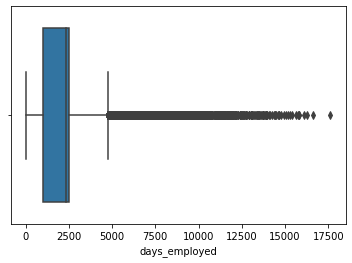

In [40]:
sns.boxplot(data['days_employed'])

Результат уже похож на реальные данные

## Изменение типов данных

Заменим вещественные тип на целочисленный.

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В таблице всего два столбца с вещественными данными: days_employed и total_income. Так единица измерения у них дни и рубли, то можно спокойно перевести в целочисленный тип.

In [42]:
data['days_employed'] = data['days_employed'].astype('int32')
data['total_income'] = data['total_income'].astype('int32')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int32
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int32
purpose             21525 non-null object
dtypes: int32(2), int64(5), object(5)
memory usage: 1.8+ MB


In [44]:
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,2352,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


## Поиск дубликатов

Проверим наличие дубликатов

Сначала переведем все стровые знаения в нижний регистр

In [45]:
data['education'] = data['education'].str.lower()
data['family_status'] = data['family_status'].str.lower()
data['gender'] = data['gender'].str.lower()
data['income_type'] = data['income_type'].str.lower()
data['purpose'] = data['purpose'].str.lower()

In [46]:
data.duplicated().sum()

71

Найден 71 дубликат, удалим их.

In [47]:
data = data.drop_duplicates()
data = data.dropna().reset_index(drop = True)

In [48]:
data.duplicated().sum()

0

### Причина появления дубликатов:

Возможные причины:
* клиент обращался повторно, при заполнение заявки не проверили, что он уже есть в базе.
* технические ошибки при выгрузки базы

## Лематизация целей кредита

Лемматизируем строки в столбце purpose (цель кредита)

In [49]:
m = Mystem() 

Найдем все возможные варианты значений столбца

In [50]:
purpuses =  data['purpose'].value_counts().index.to_list()
purpuses 

['свадьба',
 'на проведение свадьбы',
 'сыграть свадьбу',
 'операции с недвижимостью',
 'покупка коммерческой недвижимости',
 'операции с жильем',
 'покупка жилья для сдачи',
 'операции с коммерческой недвижимостью',
 'жилье',
 'покупка жилья',
 'покупка жилья для семьи',
 'строительство собственной недвижимости',
 'недвижимость',
 'операции со своей недвижимостью',
 'строительство жилой недвижимости',
 'покупка недвижимости',
 'покупка своего жилья',
 'строительство недвижимости',
 'ремонт жилью',
 'покупка жилой недвижимости',
 'на покупку своего автомобиля',
 'заняться высшим образованием',
 'автомобиль',
 'сделка с подержанным автомобилем',
 'свой автомобиль',
 'автомобили',
 'на покупку подержанного автомобиля',
 'на покупку автомобиля',
 'приобретение автомобиля',
 'дополнительное образование',
 'сделка с автомобилем',
 'высшее образование',
 'образование',
 'получение дополнительного образования',
 'получение образования',
 'профильное образование',
 'получение высшего образован

Лемматизируем найденные значения

In [51]:
list_of_lemmas = []
for word in purpuses:
    lemmas = m.lemmatize(word)
    list_of_lemmas.append(lemmas)
list_of_lemmas

[['свадьба', '\n'],
 ['на', ' ', 'проведение', ' ', 'свадьба', '\n'],
 ['сыграть', ' ', 'свадьба', '\n'],
 ['операция', ' ', 'с', ' ', 'недвижимость', '\n'],
 ['покупка', ' ', 'коммерческий', ' ', 'недвижимость', '\n'],
 ['операция', ' ', 'с', ' ', 'жилье', '\n'],
 ['покупка', ' ', 'жилье', ' ', 'для', ' ', 'сдача', '\n'],
 ['операция', ' ', 'с', ' ', 'коммерческий', ' ', 'недвижимость', '\n'],
 ['жилье', '\n'],
 ['покупка', ' ', 'жилье', '\n'],
 ['покупка', ' ', 'жилье', ' ', 'для', ' ', 'семья', '\n'],
 ['строительство', ' ', 'собственный', ' ', 'недвижимость', '\n'],
 ['недвижимость', '\n'],
 ['операция', ' ', 'со', ' ', 'свой', ' ', 'недвижимость', '\n'],
 ['строительство', ' ', 'жилой', ' ', 'недвижимость', '\n'],
 ['покупка', ' ', 'недвижимость', '\n'],
 ['покупка', ' ', 'свой', ' ', 'жилье', '\n'],
 ['строительство', ' ', 'недвижимость', '\n'],
 ['ремонт', ' ', 'жилье', '\n'],
 ['покупка', ' ', 'жилой', ' ', 'недвижимость', '\n'],
 ['на', ' ', 'покупка', ' ', 'свой', ' ', 'автом

По итогу у нас получается всего 4 вида целей: свадьба, недвижимость, автомобиль, образование. Заменим все цели на получившиеся значения.

In [52]:
for i in range(0, len(data['purpose'])):
    lemma = m.lemmatize(data.loc[i, 'purpose'])
    if 'свадьба' in lemma:
        data.loc[i, 'purpose'] = 'свадьба'
    elif 'недвижимость' in lemma or 'жилье' in lemma:
        data.loc[i, 'purpose'] = 'недвижимость'
    elif 'автомобиль' in lemma:
        data.loc[i, 'purpose'] = 'автомобиль'
    elif 'образование' in lemma:
        data.loc[i, 'purpose'] = 'образование'

In [53]:
data['purpose'].value_counts()

недвижимость    10811
автомобиль       4306
образование      4013
свадьба          2324
Name: purpose, dtype: int64

## Категоризация доходов клиентов

Осталось категозировать столбец total_income по уровню дохода. Предлагается три категории: низкий, средний, высокий.

Посмотрим распреление данных в столбце


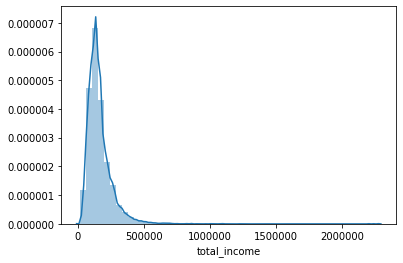

In [54]:
sns.distplot(data['total_income'])

Найдем границы разбиения (нужно разбить выборку на примерно три равные части)

In [55]:
data.describe(percentiles=[.33, .66]).apply(lambda s: s.apply('{0:.5f}'.format))

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21454.00000,21454.00000,21454.00000,21454.00000,21454.00000,21454.00000,21454.00000
mean,0.48056,2351.63578,43.27123,0.81710,0.97390,0.08115,165303.06507
std,0.75607,1981.02401,12.57082,0.54867,1.42157,0.27307,98160.94113
min,0.00000,24.00000,0.00000,0.00000,0.00000,0.00000,20667.00000
33%,0.00000,1403.00000,36.00000,1.00000,0.00000,0.00000,118514.00000
50%,0.00000,2352.00000,42.00000,1.00000,0.00000,0.00000,142594.00000
66%,1.00000,2352.00000,49.00000,1.00000,1.00000,0.00000,172357.00000
max,5.00000,17615.00000,75.00000,4.00000,4.00000,1.00000,2265604.00000


In [56]:
def income(row):
    

        if row < 122163:
                return 'низкий'
        if row >= 122163 and row <= 174870:
                return 'средний'
        return 'высокий'

In [57]:
data['total_income_category'] = data['total_income'].apply(income)

In [58]:
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437,42,высшее,0,женат / замужем,0,f,сотрудник,0,253875,недвижимость,высокий
1,1,4024,36,среднее,1,женат / замужем,0,f,сотрудник,0,112080,автомобиль,низкий
2,0,5623,33,среднее,1,женат / замужем,0,m,сотрудник,0,145885,недвижимость,средний
3,3,4124,32,среднее,1,женат / замужем,0,m,сотрудник,0,267628,образование,высокий
4,0,2352,53,среднее,1,гражданский брак,1,f,пенсионер,0,158616,свадьба,средний
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529,43,среднее,1,гражданский брак,1,f,компаньон,0,224791,недвижимость,высокий
21450,0,2352,67,среднее,1,женат / замужем,0,f,пенсионер,0,155999,автомобиль,средний
21451,1,2113,38,среднее,1,гражданский брак,1,m,сотрудник,1,89672,недвижимость,низкий
21452,3,3112,38,среднее,1,женат / замужем,0,m,сотрудник,1,244093,автомобиль,высокий


**Шаг 3. Ответьте на вопросы**

Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [59]:
children = data.groupby('children').agg({'debt':['count','sum']})
children['proportion'] = children['debt']['sum']/children['debt']['count']
children

debt       proportion
          count   sum           
children                        
0         14091  1063   0.075438
1          4855   445   0.091658
2          2128   202   0.094925
3           330    27   0.081818
4            41     4   0.097561
5             9     0   0.000000

**Ответ:** Связь есть, но она слабая. Разница в пределах 1-2%. Наиболее благонадежны клиенты, у которых нет детей.

Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [60]:
family_status = data.groupby('family_status').agg({'debt':['count','sum']})
family_status['proportion'] = family_status['debt']['sum']/family_status['debt']['count']
family_status

debt      proportion
                       count  sum           
family_status                               
в разводе               1195   85   0.071130
вдовец / вдова           959   63   0.065693
гражданский брак        4151  388   0.093471
женат / замужем        12339  931   0.075452
не женат / не замужем   2810  274   0.097509

**Ответ:** Связь есть, но она слабая. Разница в пределах 1-3%. Наиболее благонадежны клиенты в браке и вдовы/вдовцы.

Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [61]:
income = data.groupby('total_income_category').agg({'debt':['count','sum']})
income['proportion'] = income['debt']['sum']/income['debt']['count']
income

debt      proportion
                      count  sum           
total_income_category                      
высокий                6794  509   0.074919
низкий                 7466  613   0.082106
средний                7194  619   0.086044

**Ответ:** Связь есть, но она слабая. Разница в пределах 1-2%. Наиболее благонадежны клиенты с высоким уровнем дохода.

Как разные цели кредита влияют на его возврат в срок?

In [62]:
purpose = data.groupby('purpose').agg({'debt':['count','sum']})
purpose['proportion'] = purpose['debt']['sum']/purpose['debt']['count']
purpose

debt      proportion
              count  sum           
purpose                            
автомобиль     4306  403   0.093590
недвижимость  10811  782   0.072334
образование    4013  370   0.092200
свадьба        2324  186   0.080034

**Ответ:** Лучше всего кредиты возращают клиенты с целью покупки недвижимости, на втором месте цель "свадьба"

### Вывод
Искомые связи обнаружены, но они имеют слабую связь, разница между категориями в пределах 1-3%.

## Итоги
    



1. Симметричные пропуски трудового стажа и ежемесячного дохода имеют полностью случайный характер. Необходимо выяснить у коллег, делающих выгрузку, возможные причины появления пропусков. Тем не менее, возможно, пропуски значений в этих столбцах могут быть обусловлены определенными программами банка (например, кредит может быть выдан без подтверждения занятости и ежемесячного дохода, а недвижимостью или другими активами).


2. Дубликаты в данных могли возникнуть в связи с технической ошибкой при выгрузке. Также задвоенность в данных обусловлена тем, что возможно нет единого образца заполнения информации о клиентах. Необходимо попросить коллег выгружать данные с id-клиента. Также необходимо указать коллегам о задвоенности в выгрузке. 


3. Единый образец заполнения информации или же написание разработчиками определенных "стоп" значений для ячеек помогут уменьшить трудозатраты на очистку данных. Например, значения -1 в количестве детей или в поле клиента могли бы не возникнуть. 


4. Для модели кредитного скоринга необходимо учесть группы клиентов:
  - У бездетных клиентов процент просрочки кредита меньший, чем у клиентов с детьми
  - Самая рисковые клиенты с ежемесячными доходами до 175 тысяч рублей
  - Чаще всего клиенты, не состоящие в официальном браке, задерживают выплату кредитных средств 
  - Также наиболее уязвимая для банка группа клиентов, которая взяла заемные средства для операций с автомобилем и получения образования
    
